In [1]:
from stompy.grid import unstructured_grid,rebay
from stompy.spatial import field
import matplotlib.pyplot as plt
from stompy.spatial import linestring_utils
import numpy as np
%matplotlib inline

In [2]:
# Create a small triangular grid to play with
s=np.linspace(0,2*np.pi,200)
bound= 100*np.c_[ 0.7*np.cos(3*s)+2*np.cos(s),
                  0.7*np.sin(2*s)+2*np.sin(s)]
res=field.ConstantField(15)
bound=linestring_utils.resample_linearring(bound,res,closed_ring=1)       

g_in=unstructured_grid.UnstructuredGrid(max_sides=len(bound))
bnodes=[g_in.add_node(x=x) for x in bound]
g_in.add_cell_and_edges(bnodes)
reb=rebay.RebayAdvancingDelaunay(grid=g_in,scale=res)

reb.execute()
grid=reb.extract_result()

INFO:join_features:0 open strings, 1 simple polygons
INFO:join_features:Building index
INFO:join_features:done building index
INFO:join_features:Examining largest poly left with area=125532.494127, 0 potential interiors
INFO:Triangulation:Recalculating edge to cells


...........................................................................................................................................................................................................................................................................................................................................................................................................

INFO:UnstructuredGrid:0 nodes found to be orphans
INFO:UnstructuredGrid:Will flip 9 edges


....

(-296.8987623584154,
 297.0021760159729,
 -257.77885500559245,
 257.77885500559256)

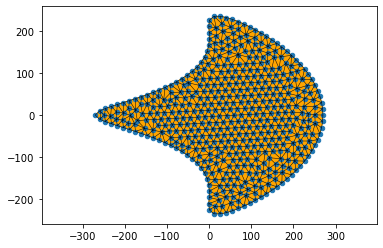

In [3]:
# Plotting grid elements:
plt.figure()
grid.plot_edges(color='k',lw=0.5)
grid.plot_cells(color='orange')
grid.plot_nodes()
plt.axis('equal')

(-296.89141565956464, 296.9948293171221, -257.7675430355076, 257.7675430355077)

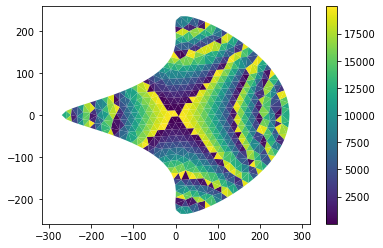

In [4]:
# Plotting values on cells:
# Make up a cell-centered value to plot, something with both
# smooth and sharp transitions:
centers=grid.cells_center()
cell_scalar=(centers[:,1]**2-centers[::,0]**2)%20000

plt.figure()
coll=grid.plot_cells(values=cell_scalar)
plt.colorbar(coll)
plt.axis('equal')

(-296.89141565956464, 296.9948293171221, -257.7675430355076, 257.7675430355077)

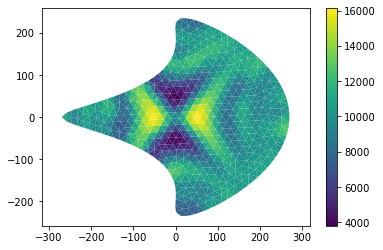

In [5]:
# Ways to show a smoother plot:
# A: Smooth the data but keep it on cells:
M=grid.smooth_matrix()

cell_scalar_smoothed=cell_scalar
for _ in range(15): # generally fast, not worth making implicit
    cell_scalar_smoothed=M.dot(cell_scalar_smoothed)
    
plt.figure()
coll=grid.plot_cells(values=cell_scalar_smoothed)
plt.colorbar(coll)
plt.axis('equal')

(-296.89141565956464, 296.9948293171221, -257.7675430355076, 257.7675430355077)

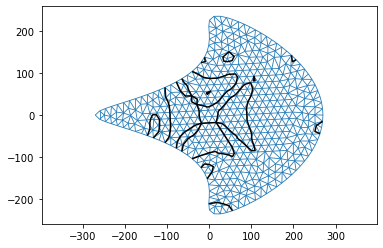

In [6]:
# B: Cell-based scalar contours
fig,ax=plt.subplots()
grid.plot_edges(zorder=-2)
ecoll=grid.scalar_contour(cell_scalar_smoothed,4,smooth=True)
ax.add_collection(ecoll)
plt.axis('equal')

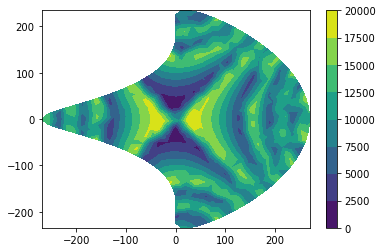

In [7]:
# Shift values to nodes and contour:
node_values=grid.interp_cell_to_node(cell_scalar)
fig,ax=plt.subplots()
cset=grid.contourf_node_values(node_values)
plt.colorbar(cset)

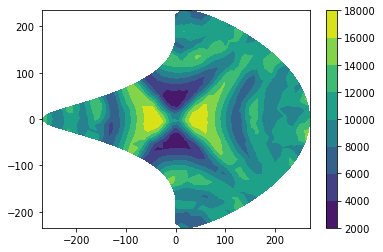

In [8]:
# Cell smoothing and then shift values to nodes and contour:
M=grid.smooth_matrix()
cell_scalar_smooth=cell_scalar
for _ in range(5): cell_scalar_smooth=M.dot(cell_scalar_smooth)
node_values=grid.interp_cell_to_node(cell_scalar_smooth)
fig,ax=plt.subplots()
cset=grid.contourf_node_values(node_values)
plt.colorbar(cset)